# Security of the DMPC

The objective of this study is to determine ways to detect users who would cheat in the distribution process. Both a greedy user and a nihilist user can be the cheater.

For the sake of the simplicity, we will only focus on a static model. But please notice that all those results can easily be extended to the DMPC.

-- Sylvain Chatel, July 2016--

In [1]:
from __future__ import division, print_function
import StaticOptimization as SO
from cvxopt import matrix, solvers
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from tempfile import TemporaryFile
%matplotlib inline

/Users/sylvainchatel/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Definition of the problem

In [2]:
# number of users
m = 6
# vector of users
i = np.arange(m)
# max energy in kW
Umax = 4
# max admissible energy
u_m = np.array([1, 1, 1, 1, 1, 1], dtype=float)
# Thermal parameters
    ## Thermal resistance
Rth =np.array([10, 10, 10, 10, 10, 10])
    ## Exterior temperature
Text = 10
    ## Ideal temperature in degrees
T_id = np.array([21, 21, 21, 21, 21, 21], dtype=float)
# comfort factor
alpha = np.asarray([10, 10, 10, 10, 10, 10], dtype=float)

pb = dict(Rth=Rth, Text=Text, T_id=T_id, Umax=Umax, u_m=u_m, alpha=alpha, m=m)

break at 122.


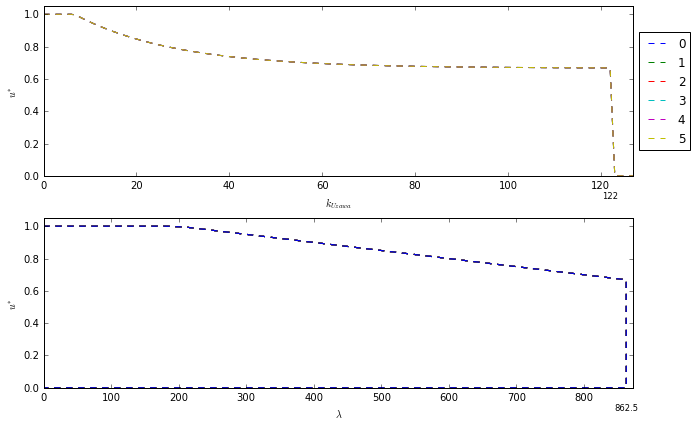

In [3]:
SO.pwrdist(pb, 15, 1.0e-2, k_max=1000)
plt.show()

## Study of the influence of the comfort alpha

In this section, we will focus on the influence of the comfort parameter $\alpha$ in order to see if there is a way to detect a cheating user.

In [4]:
pb['alpha'] = np.asarray([10, 20, 40, 60, 80, 100], dtype=float)

break at 793.


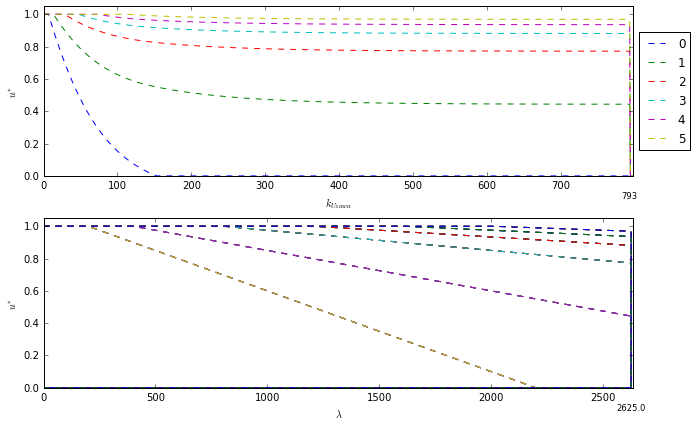

In [5]:
SO.pwrdist(pb, 15, 1.0e-3, k_max=1000)
plt.show()

In [8]:
# number of users
m = 20
# vector of users
i = np.arange(m)
# max energy in kW
Umax = 4
# max admissible energy
u_m = np.ones(20)*1.
# Thermal parameters
    ## Thermal resistance
Rth =np.ones(20)*10.
    ## Exterior temperature
Text = 10
    ## Ideal temperature in degrees
T_id = np.ones(20)*21.
# comfort factor
alpha = np.asarray(np.linspace(1, 150, 20))

pb = dict(Rth=Rth, Text=Text, T_id=T_id, Umax=Umax, u_m=u_m, alpha=alpha, m=m)

break at 796.


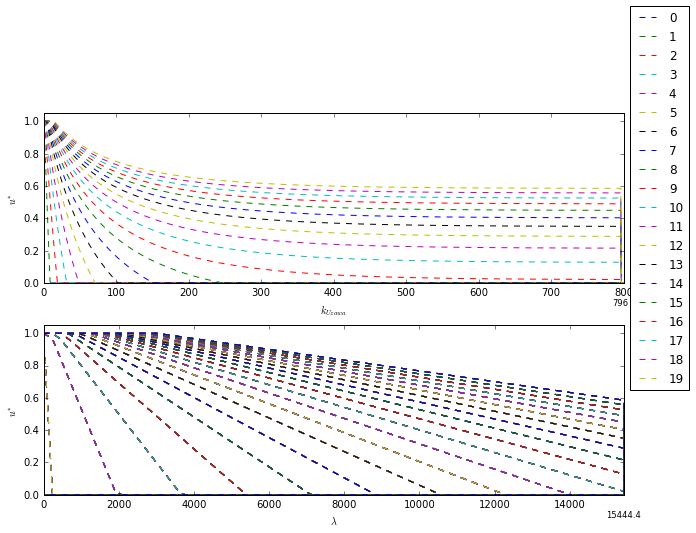

In [7]:
SO.pwrdist(pb, 15, 1.0e-2, k_max=1000)
plt.show()

On the two graphs above, we can see a cluster formed for different values of $\alpha$. *Please note that each value of $\alpha$ is ten times the number of the user*. It shows a pretty even repartition of the cluster. Hence it is possible for the coordinator to set a threshold value above which the user will be considered as a cheater. If we set, for instance $\alpha_{th}= 120$, then all the cheating users (i.e. 12-19) will be discovered easily. 

# Conclusion

Thanks to this study, we have pointed out a way to detect misleading user for the DMPC. Our solution is to use the relation between the optimal energy $u^*$ and both the number of Uzawa iterations and the value of the Lagrangian multiplier.

This method enables the coordiantor to discover an abnormal activity and take the required measures in order to maintain the DMPC working efficiently.